# Dimensionless Finite-Temperature Vertex Function Convergence Plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

import finite_temperature_vertex as ftv

In [2]:
eps = sp.symbols('eps')

In [3]:
def real_finite_part(expr):
    """Return the real finite part of expr."""
    return complex(expr.subs(eps, 0)).real

In [54]:
q1_eucl = [1, 0, 0, 0]
q2_eucl = [2, 0, 0, 0]
xis = 1, 1, 1
a = 10

In [55]:
n_max = 10

In [56]:
uncorrected_results =\
    ftv.dimless_vertex_partial_sum_sequence(q1_eucl, q2_eucl, xis, a, n_max, add_zeta_correction=False)

In [57]:
corrected_results =\
    ftv.dimless_vertex_partial_sum_sequence(q1_eucl, q2_eucl, xis, a, n_max, add_zeta_correction=True)

In [58]:
uncorrected_parsums = np.array([real_finite_part(parsum) for parsum in uncorrected_results[0]])
corrected_parsums = np.array([real_finite_part(parsum) for parsum in corrected_results[0]])

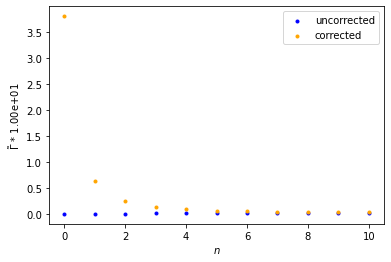

In [61]:
n_grid = np.arange(0, n_max + 1)
scale = 10
fig, ax = plt.subplots()
ax.scatter(n_grid, uncorrected_parsums * scale, color='blue', label='uncorrected', marker='.')
ax.scatter(n_grid, corrected_parsums * scale, color='orange', label='corrected', marker='.')
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$\tilde{\Gamma}$' + ' * {:4.2e}'.format(scale))
ax.legend(loc='upper right')